# HW6  Starter Code

## For Q1


In [183]:
using Pkg
Pkg.add("JuMP")
Pkg.add("HiGHS")
Pkg.add("Ipopt")
Pkg.add("LinearAlgebra")

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`


In [184]:
using JuMP, HiGHS, Ipopt
using LinearAlgebra

M = 20
N = 100

# generate the random polyhedron

b = rand(M)*100 
A = rand(M,N)*4 .- 2;

# model for 1-norm projection
norm1 = Model(HiGHS.Optimizer) 

# model for 2-norm projection
norm2 = Model(Ipopt.Optimizer) 

# model for infinity-norm projection
norm_inf = Model(HiGHS.Optimizer) 

# use these commands to suppress diagnostic output
set_silent(norm1)
set_silent(norm2)
set_silent(norm_inf)

# do "iteration" tests of random points to see what fraction are in the polyhedron

count_in=0
iteration = 1000

# Here insert "iteration" random trials for points and check to see whether they are in P. 
# Increment count_in if they are. 
# save a point x_hat that is NOT in P
# Calculate prob_in_P.
x_hat = zeros(N,1) # initialize x_hat outside of P
x_all = zeros(N,1)
for i in 1:iteration
    x = rand(N)*2 .- 1 # generate a random point
    x_all = hcat(x_all, x)
    if A*x ≤ b # check if it's in P
        count_in += 1
    else
        x_hat = hcat(x_hat, x)
    end
end

prob_in_P = count_in / iteration
print("probability of point in polyhedron = ",prob_in_P)

probability of point in polyhedron = 0.912

In [185]:
x_hat = x_hat[:,2]
x_all = x_all[:,2:end]

100×1000 Matrix{Float64}:
 -0.652312   -0.640847     0.0229844  …   0.984202   -0.100686   -0.305273
  0.720641    0.868455     0.830698      -0.458179    0.148903   -0.838514
  0.333323    0.49583     -0.0881107     -0.863785    0.605471   -0.708208
  0.168598   -0.528861    -0.597856      -0.625301    0.193907    0.154322
 -0.600663    0.745819     0.180913      -0.338974    0.69252     0.503845
  0.490046    0.404924    -0.0556209  …  -0.583911   -0.158488    0.350467
 -0.078334   -0.85851      0.140337       0.928868   -0.96643     0.140497
  0.945474   -0.0718247   -0.856318      -0.423247    0.958902   -0.343
  0.695872    0.383326     0.0665723     -0.414106   -0.369739    0.77224
  0.435933   -0.075376     0.127844       0.418765   -0.141806    0.602991
  0.113809    0.780784    -0.963066   …  -0.257667    0.442813    0.944305
 -0.779981   -0.454906    -0.628898      -0.0386574   0.0576049  -0.0399505
 -0.785347   -0.664361     0.942853      -0.793925   -0.669914    0.463316
  

## Q1b

In [189]:
# model for 2-norm projection
norm2 = Model(Ipopt.Optimizer) 
# here define variables for 2-norm projection
@variable(norm2, x[1:N])

@constraint(norm2, A * x[1:N] .<= b)

# solve the three models and print results.
print("\n************** norm2 **************\n")
@objective(norm2, Min, sum((x.- x_hat).^2));
optimize!(norm2);
print("2-norm distance to P is ",objective_value(norm2))



************** norm2 **************
This is Ipopt version 3.14.4, running with linear solver MUMPS 5.5.1.

Number of nonzeros in equality constraint Jacobian...:        0
Number of nonzeros in inequality constraint Jacobian.:     2000
Number of nonzeros in Lagrangian Hessian.............:      100

Total number of variables............................:      100
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        0
Total number of inequality constraints...............:       20
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:       20

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  3.6757814e+01 0.00e+00 2.44e+00  -1

In [156]:
# model for 1-norm projection
norm1 = Model(HiGHS.Optimizer) 
# here define variables for 1-norm projection
@variable(norm1, x[1:N])
@variable(norm1, t[1:N])

# norm-1 projection
@constraint(norm1, A * x[1:N] .<= b)
for i = 1:N
    @constraint(norm1, x[i] - x_hat[i] <= t[i] )
    @constraint(norm1, x[i] - x_hat[i] >= -t[i] )
end
print("\n************** norm1 **************\n")
@objective(norm1, Min, sum(t))
optimize!(norm1);
print("1-norm distance to P is ", objective_value(norm1))


************** norm1 **************
Running HiGHS 1.4.2 [date: 1970-01-01, git hash: f797c1ab6]
Copyright (c) 2022 ERGO-Code under MIT licence terms
Presolving model
220 rows, 200 cols, 2400 nonzeros
220 rows, 200 cols, 2400 nonzeros
Presolve : Reductions: rows 220(-0); columns 200(-0); elements 2400(-0) - Not reduced
Problem not reduced by presolve: solving the LP
Using EKK dual simplex solver - serial
  Iteration        Objective     Infeasibilities num(sum)
          0    -6.4800000000e+05 Ph1: 133(1.05358e+06); Du: 100(648) 0s
        290     9.4052120587e-01 Pr: 0(0) 0s
Model   status      : Optimal
Simplex   iterations: 290
Objective value     :  9.4052120587e-01
HiGHS run time      :          0.02
1-norm distance to P is 0.9405212058702902

In [157]:
# model for infinity-norm projection
norm_inf = Model(HiGHS.Optimizer) 
# here define variables for infinity-norm projection
@variable(norm_inf, x[1:N])
@variable(norm_inf, r)
# infinity-norm projection
@constraint(norm_inf, A * x[1:N] .<= b)
for i = 1:N
    @constraint(norm_inf, x[i] - x_hat[i] <= r )
    @constraint(norm_inf, x[i] - x_hat[i] >= -r )
end
print("\n************** norm inf **************\n")
@objective(norm_inf, Min, r)
optimize!(norm_inf);
print("inf-norm distance to P is ",objective_value(norm_inf))


************** norm inf **************
Running HiGHS 1.4.2 [date: 1970-01-01, git hash: f797c1ab6]
Copyright (c) 2022 ERGO-Code under MIT licence terms
Presolving model
220 rows, 101 cols, 2400 nonzeros
220 rows, 101 cols, 2400 nonzeros
Presolve : Reductions: rows 220(-0); columns 101(-0); elements 2400(-0) - Not reduced
Problem not reduced by presolve: solving the LP
Using EKK dual simplex solver - serial
  Iteration        Objective     Infeasibilities num(sum)
          0    -8.0000000000e+03 Ph1: 186(1.09758e+06); Du: 1(8) 0s
        438     1.8492288072e-02 Pr: 0(0) 0s
Model   status      : Optimal
Simplex   iterations: 438
Objective value     :  1.8492288072e-02
HiGHS run time      :          0.01
inf-norm distance to P is 0.0184922880722192

## For Q2
### Eigenvectors and eigenvalues

a) v = [x y z]^T,
Q = [2 2 -3; 2 6 -3; -3 -3 2]

In [132]:
using LinearAlgebra

Q = [2 2 -3; 2 6 -3; -3 -3 2]

# use eigvals() to get the eigenvalues of a matrix
eigvals(Q)

3-element Vector{Float64}:
 -1.0990195135927852
  1.9999999999999998
  9.099019513592784

b) Let's consider a symmetric matrix A ∈ Rnxn.
1. Q = LL. Transpose for some L ∈ Rnxn
2. All the n eigenvalues of Q are nonnegative, we can get A = [2 2 -3; 2 6 -3; -3 -3 2] the diagnoal entries are the constraints of square terms of the x, y, and z variables. 

c) By separating the positive eigenvalues from the negative ones, we can divide the constraint into two parts.
The decomposition appears like this since the eigenvalues are involved.

In [133]:
v = randn(3,1);

A = diagm([sqrt.(2),sqrt.(0.099)]) * U[:,[2,3]]'
B = sqrt.(2)*U[:,1]'
println("A = ", A)
println("B = ", B)
println("v'Qv = ", (v'*Q*v)[1])
println("|Av|^2 - |Bv|^2 = ", norm(A*v)^2 - norm(B*v)^2)

A = [0.0 1.1766968108291043 0.7844645405527362; 0.22248595461286985 0.22248595461286985 0.0]
B = [1.4142135623730951 0.0 0.0]
v'Qv = 20.494159117056803
|Av|^2 - |Bv|^2 = 3.1998315104811397


## Q2D

- To obtain a negative quadratic form, any multiple of that value will result in an even more negative outcome that still meets the given constraint.
- If we consider the linear combination of this particular set of value, espcially by some positibe number bigger. Then, the v^TQv should be less than 1. We could scalke this by some positive arbitrarily large numbers.

## Q3

### 1. Plotting

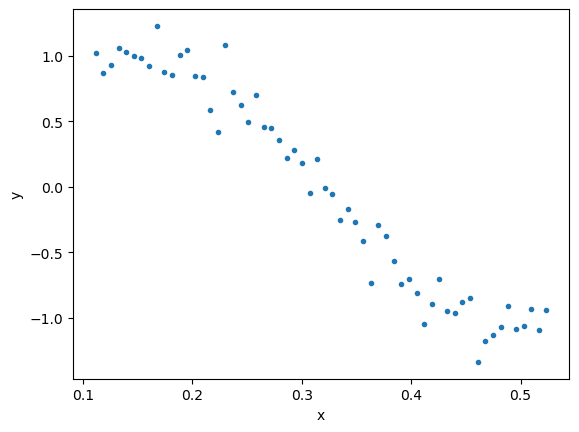

In [160]:
using PyPlot, CSV, DataFrames, Polynomials
data = CSV.read("lasso_data.csv", DataFrame)
x = data[:,1]
y = data[:,2]
plot(x, y, ".");
xlabel("x"); ylabel("y");
n=size(data, 1);

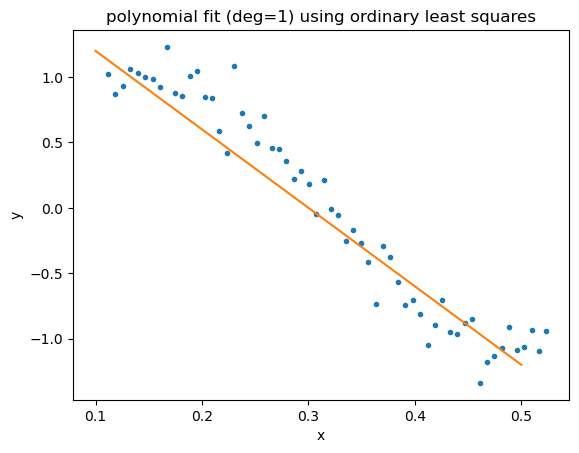

In [161]:
# plot a line on top of it
f(x) = -6 * x + 1.8;
# points of the line
xs = range(0.1, 0.5, length=100);
ys = f.(xs);
# plot the scatters again
plot(x, y, ".");
# plot the line
plot(xs,ys,"-");
title(string("polynomial fit (deg=", 1, ") using ordinary least squares"));
xlabel("x"); ylabel("y");

This is Ipopt version 3.14.4, running with linear solver MUMPS 5.5.1.

Number of nonzeros in equality constraint Jacobian...:        0
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:       21

Total number of variables............................:        6
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        0
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  3.8919302e+01 0.00e+00 1.20e+01  -1.0 0.00e+00    -  0.00e+00 0.00e+00  

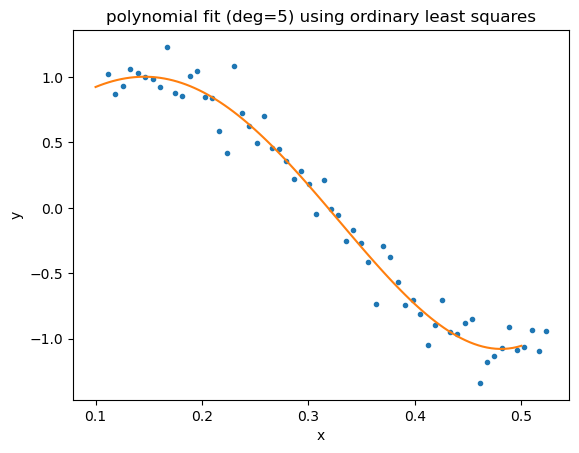

In [172]:
k = 5
# Create the A matrix (where each row corresponds to one observation x_i and
n = length(x)
A = zeros(n,k+1)
for i = 1:n
    for j = 1:k+1
        A[i,j] = x[i]^(k+1-j)
    end
end

m = Model(Ipopt.Optimizer)
@variable(m, u[1:k+1])
@objective(m, Min, sum( (y - A*u).^2 ) )
optimize!(m)

result_5 = value.(u)
f(x) = result_5[1]*x^5 + result_5[2]*x^4 + result_5[3]*x^3 + result_5[4]*x^2 + result_5[5]*x + result_5[6]
xs = range(0.1, 0.5, length=100);
ys = f.(xs);
# plot the scatters again
plot(x, y, ".");
# plot the line
plot(xs,ys,"-");
title(string("polynomial fit (deg=", 5, ") using ordinary least squares"));
xlabel("x"); ylabel("y");

This is Ipopt version 3.14.4, running with linear solver MUMPS 5.5.1.

Number of nonzeros in equality constraint Jacobian...:        0
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:      136

Total number of variables............................:       16
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        0
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  3.8919302e+01 0.00e+00 1.20e+01  -1.0 0.00e+00    -  0.00e+00 0.00e+00  

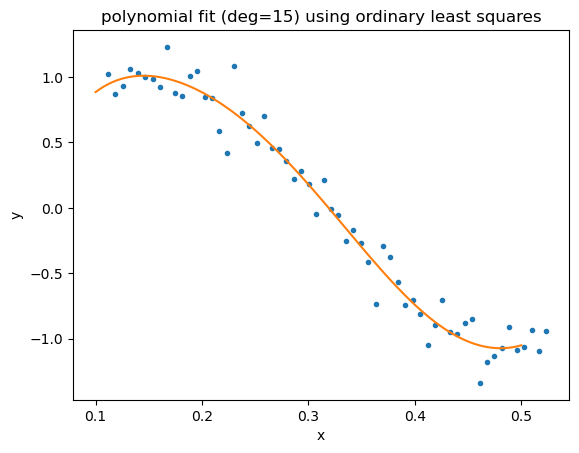

In [173]:
k = 15
# Create the A matrix (where each row corresponds to one observation x_i and
n = length(x)
A = zeros(n,k+1)
for i = 1:n
    for j = 1:k+1
        A[i,j] = x[i]^(k+1-j)
    end
end

m = Model(Ipopt.Optimizer)
@variable(m, u[1:k+1])
@objective(m, Min, sum( (y - A*u).^2 ) )
optimize!(m)

result_15 = value.(u)
f(x) = result_15[1] * x^15 + result_15[2] * x^14 + result_15[3] * x^13 + result_15[4]*x^12 + result_15[5]*x^11 + result_15[6] * x^10 + result_15[7]*x^9 + result_15[8] * x^8 + result_15[9] * x^7 + result_15[10] * x^6 + result_15[11] * x^5 + result_15[12] * x^4 + result_15[13] * x^3 + result_15[14] * x^2 + result_15[15] * x + result_15[16];
xs = range(0.1, 0.5, length=100);
ys = f.(xs);
# plot the scatters again
plot(x, y, ".");
# plot the line
plot(xs,ys,"-");
title(string("polynomial fit (deg=", 15, ") using ordinary least squares"));
xlabel("x"); ylabel("y");

- we can see that the degree of the polynomial fit increases, so the coefficients are getting larger and the fit becomes increasingly oscillatory. 

### Q3b

Running HiGHS 1.4.2 [date: 1970-01-01, git hash: f797c1ab6]
Copyright (c) 2022 ERGO-Code under MIT licence terms
0, 38.919304, 16, 0.002617, 0.000000, 0, 0.000000, 0.000000
123, 1.022678, 16, 0.006874, 0.000000, 0, 0.000000, 1.000000
Model   status      : Optimal
QP ASM    iterations: 123
Objective value     :  1.0223298232e+00
HiGHS run time      :          0.01


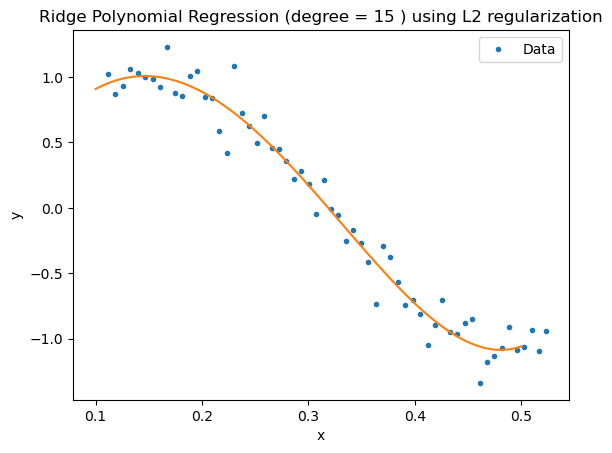

PyObject Text(0.5, 1.0, 'Ridge Polynomial Regression (degree = 15 ) using L2 regularization')

In [170]:
k = 15
lambda = 1e-6
A = zeros(length(x), k + 1)

# construct design matrix for polynomial regression
for i = 1:length(x)
    for j = 1:k+1
        A[i,j] = x[i]^(k+1-j);
    end
end

m = Model(HiGHS.Optimizer)
@variable(m, u[1:k+1])
@variable(m, t[1:n] >= 0)
@constraint(m, y - A*u .<= t)
@constraint(m, y - A*u .>= -t)
@objective(m,Min, sum(t.^2) + lambda * sum(u.^2) )
optimize!(m)
result = value.(u)

xfine = range(0.1,stop= 0.5, length = 100)
ffine = ones(100)
for j = 1:k
    ffine = [ffine.*xfine ones(100)]
end
yfine = ffine * result
# plot data and polynomial fit
figure()
plot(x, y, ".", label="Data")
plot(xfine, yfine)
xlabel("x")
ylabel("y")
legend(loc="best")
title("Ridge Polynomial Regression (degree = 15 ) using L2 regularization")

The new model and the previous one perform similar with degree 15 but the magnitudes of the coefficients decrease significantly.

## Q3c

Set parameter Username
Academic license - for non-commercial use only - expires 2024-02-22
Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored
Gurobi Optimizer version 10.0.0 build v10.0.0rc2 (mac64[x86])

CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 152 rows, 92 columns and 2094 nonzeros
Model fingerprint: 0xf96d62dd
Model has 60 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e-13, 1e+00]
  Objective range  [1e-06, 1e-06]
  QObjective range [2e+00, 2e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [8e-03, 1e+00]
Presolve removed 16 rows and 0 columns
Presolve time: 0.01s
Presolved: 136 rows, 92 columns, 2062 nonzeros
Presolved model has 60 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 Free vars  : 16
 AA' NZ     : 9.050e+03
 Factor NZ  : 9.316e+03
 Factor Ops : 8.478e+05 (less than 1 second per iter

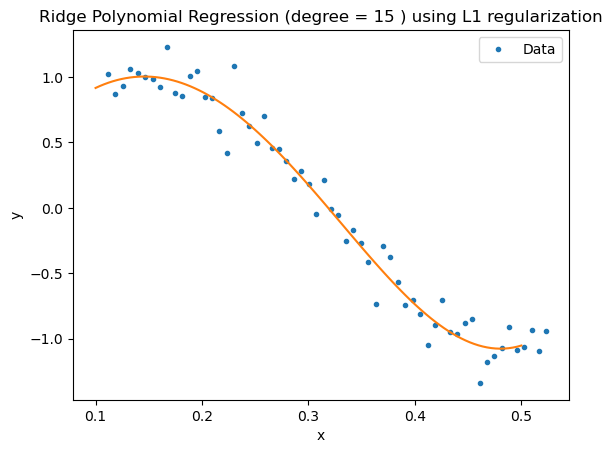

PyObject Text(0.5, 1.0, 'Ridge Polynomial Regression (degree = 15 ) using L1 regularization')

In [171]:
using Gurobi
k = 15
lambda = 1e-6
A = zeros(length(x), k + 1)

# construct design matrix for polynomial regression
for i = 1:length(x)
    for j = 1:k+1
        A[i,j] = x[i]^(k+1-j);
    end
end

m = Model(Gurobi.Optimizer)
@variable(m, u[1:k+1])
@variable(m, t[1:n] >= 0)
@variable(m, r[1:k+1])
@constraint(m, y - A*u .<= t)
@constraint(m, y - A*u .>= -t)
@constraint(m, u .<= r)
@constraint(m, -u .<= r)
@objective(m, Min, sum(t.^2) + lambda * sum(r) )
optimize!(m)
result = value.(u)

xfine = range(0.1,stop= 0.5, length = 100)
ffine = ones(100)
for j = 1:k
    ffine = [ffine.*xfine ones(100)]
end
yfine = ffine * result
# plot data and polynomial fit
figure()
plot(x, y, ".", label="Data")
plot(xfine, yfine)
xlabel("x")
ylabel("y")
legend(loc="best")
title("Ridge Polynomial Regression (degree = 15 ) using L1 regularization")